# Software developer salary prediction
## 1. Đặt vấn đề: 
- Công nghệ số đang phát triển nhưng nguồn nhân lực có trình độ còn hạn chế. Do đó, nhà tuyển dụng cần đưa ra mức lương phù hợp để thu hút các ứng cử viên. Bên cạnh đó, ứng cử viên cũng có thể biết được điều kiện cần để có được mức lương mong muốn. 
- Giải pháp: Xây dựng mô hình dự đoán lương của nhà phát triển phần mềm dựa trên các tiêu chí ..

## Tổng quan dự án
Dự án bao gồm các bước sau,

- **Exploratory Data Analysis**: Explore the various features, their distributions using Histograms and Box-plots
- **Pre-processing and Data Cleaning**: Normalisation, filling missing values, encoding categorical values
- **Feature Selection**: Study the correlation with response variable (Listing Price) and determine which features are most useful in predicting the price.
- **Model Fitting and Selection**: Training different models, tuning hyper-parameters and studying Model performance using Learning Curve.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## About Data

In [68]:
df = pd.read_csv("../dataset/survey_results_public.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [69]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [70]:
# Chọn các cột cần lấy
selected_columns = ['RemoteWork','EdLevel', 'YearsCodePro', 
       'DevType', 'Country', 'Age', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 
       'ConvertedCompYearly']

## Giải thích cái cột (Huỳnh Công Đức)

In [71]:
# Tạo DataFrame mới chỉ chứa các cột đã chọn
df = df[selected_columns]
# Đỏi tên các cột
df = df.rename({"ConvertedCompYearly": "Salary", 
              "LanguageHaveWorkedWith": "Language", 
              "DatabaseHaveWorkedWith": "Database",
              "PlatformHaveWorkedWith":  "Platform",
              "ToolsTechHaveWorkedWith": "ToolsTech",
              "NEWCollabToolsHaveWorkedWith": "CollabTool"}, axis=1)

## Data Cleaning

In [72]:
df.isnull().sum()

RemoteWork      15374
EdLevel          1211
YearsCodePro    23048
DevType         12312
Country          1211
Age                 0
Language         2044
Database        15749
Platform        25556
ToolsTech       11300
CollabTool       3320
Salary          41165
dtype: int64

In [73]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0.
            # Mark the value in the option column as True
            result_df.at[idx, option] = 1.
    return result_df[options]

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

def age_process(val):
    if val == "Under 18 years old":
        return "Under 18"
    if val == "18-24 years old":
        return "18-24"
    if val == "25-34 years old":
        return "25-34"
    if val == "35-44 years old":
        return "35-44"
    return "Over 45"

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

def YearCodeProProcess(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

def remote_work_process(val):
    if val == 'Hybrid (some remote, some in-person)':
        return "Hybrid"
    if val == 'Remote':
        return "Remote"
    else:
        return "Person"

In [74]:
df = df[df['Salary'].notnull()]

### Xử lí cột "Country"

In [75]:
country_map = shorten_categories(df.Country.value_counts(), 100)
df['Country'] = df['Country'].map(country_map)
df['Country'] = df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df['Country'] = df['Country'].replace('United States of America', 'USA')
df['Country'] = df['Country'].replace('Iran, Islamic Republic of...', 'Iran')  
df.Country.value_counts()

Country
USA                   11881
Germany                3970
UK                     3544
Other                  2364
Canada                 2105
India                  1868
France                 1801
Netherlands            1362
Poland                 1266
Brazil                 1252
Australia              1211
Spain                  1150
Sweden                 1056
Italy                  1012
Switzerland             662
Austria                 531
Denmark                 516
Czech Republic          493
Norway                  486
Portugal                478
Israel                  470
Belgium                 445
Finland                 440
Russian Federation      426
Ukraine                 421
New Zealand             414
Romania                 408
Turkey                  395
South Africa            351
Greece                  336
Mexico                  330
Hungary                 306
Ireland                 285
Colombia                278
Argentina               277
Pakistan    

In [76]:
df['Country'].unique()

array(['USA', 'Philippines', 'UK', 'Finland', 'Australia', 'Netherlands',
       'Germany', 'Sweden', 'France', 'Other', 'Nigeria', 'Spain',
       'South Africa', 'Brazil', 'Portugal', 'Italy', 'Bangladesh',
       'Canada', 'Argentina', 'Switzerland', 'Lithuania', 'Serbia',
       'India', 'Russian Federation', 'Greece', 'Austria', 'Norway',
       'Singapore', 'Turkey', 'Croatia', 'Poland', 'Iran', 'Slovenia',
       'China', 'Belgium', 'Romania', 'Denmark', 'Hungary', 'Viet Nam',
       'Israel', 'Ukraine', 'Estonia', 'Indonesia', 'Ireland', 'Georgia',
       'Japan', 'Czech Republic', 'Malaysia', 'Pakistan', 'New Zealand',
       'Slovakia', 'Bulgaria', 'Thailand', 'Colombia', 'Mexico', 'Chile'],
      dtype=object)

### Xử lí cột "Age"

In [77]:
df = df[df['Age'] != "Prefer not to say"]

In [78]:
df['Age'] = df['Age'].apply(age_process)

In [79]:
df['Age'].value_counts()

Age
25-34       22163
35-44       13848
Over 45      7000
18-24        4922
Under 18       56
Name: count, dtype: int64

### Xử lý cột "EdLevel"

In [80]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [81]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree        22528
Master’s degree          13038
Less than a Bachelors    10128
Post grad                 2295
Name: count, dtype: int64

### Xử lý cột "RemoteWork"

In [82]:
df['RemoteWork'] = df['RemoteWork'].apply(remote_work_process)
df['RemoteWork'].value_counts()

RemoteWork
Remote    21128
Hybrid    20266
Person     6595
Name: count, dtype: int64

### Xử lý cột "YearCodePro"

In [83]:
df['YearsCodePro'] = df['YearsCodePro'].apply(YearCodeProProcess)

In [84]:
df = df[df['YearsCodePro'].notnull()]

In [85]:
df.columns

Index(['RemoteWork', 'EdLevel', 'YearsCodePro', 'DevType', 'Country', 'Age',
       'Language', 'Database', 'Platform', 'ToolsTech', 'CollabTool',
       'Salary'],
      dtype='object')

In [86]:
df['Country'].unique()

array(['USA', 'Philippines', 'UK', 'Finland', 'Australia', 'Netherlands',
       'Germany', 'Sweden', 'France', 'Other', 'Nigeria', 'Spain',
       'South Africa', 'Brazil', 'Portugal', 'Italy', 'Bangladesh',
       'Canada', 'Argentina', 'Switzerland', 'Lithuania', 'Serbia',
       'India', 'Russian Federation', 'Greece', 'Austria', 'Norway',
       'Singapore', 'Turkey', 'Croatia', 'Poland', 'Iran', 'Slovenia',
       'China', 'Belgium', 'Romania', 'Denmark', 'Hungary', 'Viet Nam',
       'Israel', 'Ukraine', 'Estonia', 'Indonesia', 'Ireland', 'Georgia',
       'Japan', 'Czech Republic', 'Malaysia', 'Pakistan', 'New Zealand',
       'Slovakia', 'Bulgaria', 'Thailand', 'Colombia', 'Mexico', 'Chile'],
      dtype=object)

In [87]:
df.columns

Index(['RemoteWork', 'EdLevel', 'YearsCodePro', 'DevType', 'Country', 'Age',
       'Language', 'Database', 'Platform', 'ToolsTech', 'CollabTool',
       'Salary'],
      dtype='object')

### Xử lí Dev_Type

In [88]:
df = df[df['DevType'].notnull()]

In [89]:
Dev_Type = split_multicolumn(df['DevType'])
# Chon các công cụ có hơn 1k người sử dụng
selected_DevType = Dev_Type.columns[Dev_Type.sum()>200]

def assign_other(row):
    if any(role in row for role in selected_DevType):
        if "Other (please specify)" in row:
            return 'Other'
        return row
    else:
        return 'Other'

df['DevType'] = df['DevType'].apply(assign_other)

In [90]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            16986
Developer, back-end                               9524
Developer, front-end                              3262
Other                                             2595
Developer, desktop or enterprise applications     2426
Developer, mobile                                 1644
Engineering manager                               1307
Developer, embedded applications or devices       1263
Data scientist or machine learning specialist      987
DevOps specialist                                  980
Engineer, data                                     898
Research & Development role                        825
Senior Executive (C-Suite, VP, etc.)               771
Cloud infrastructure engineer                      763
Academic researcher                                609
Developer, game or graphics                        490
Data or business analyst                           447
Developer, QA or test                              360
Sy

### Xử lý cột "Language"

In [91]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
language = split_multicolumn(df['Language'])
# Chọn những ngôn ngữ chiếm ưu thế
selected_language = language.columns[language.sum()>10000]
language = language[selected_language]
language.fillna(0, inplace=True)
language['Other language'] = language.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

df.index.name = 'id'
df = df.reset_index()

language.index.name = 'id'
language = language.reset_index()

df = pd.merge(df,language,on='id',how='inner')

df = df.drop(['id', 'Language'], axis=1)

### Xử lý cột "Database"

In [92]:
database = split_multicolumn(df['Database'])
selected_database = database.columns[database.sum()>5000]
database = database[selected_database]
database.fillna(0, inplace=True)
database['Other database'] = database.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

df.index.name = 'id'
df = df.reset_index()

database.index.name = 'id'
database = database.reset_index()

df = pd.merge(df,database,on='id',how='inner')

df = df.drop(['id', 'Database'], axis=1)

### Xử lý cột "Platform"

In [93]:
platform = split_multicolumn(df['Platform'])
selected_platform = platform.columns[platform.sum()>5000]
platform = platform[selected_platform]
platform.fillna(0, inplace=True)
platform['Other platform'] = platform.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

df.index.name = 'id'
df = df.reset_index()

platform.index.name = 'id'
platform = platform.reset_index()

df = pd.merge(df,platform,on='id',how='inner')

df = df.drop(['id', 'Platform'], axis=1)

### Xử lý cột "ToolsTech"

In [94]:
toolsTech = split_multicolumn(df['ToolsTech'])
selected_toolsTech = toolsTech.columns[toolsTech.sum()>10000]
toolsTech = toolsTech[selected_toolsTech]
toolsTech.fillna(0, inplace=True)
toolsTech['Other ToolsTech'] = toolsTech.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

df.index.name = 'id'
df = df.reset_index()

toolsTech.index.name = 'id'
webframe = toolsTech.reset_index()

df = pd.merge(df, toolsTech,on='id',how='inner')

df = df.drop(['id', 'ToolsTech'], axis=1)

### Xử lý cột "CollabTool"

In [95]:
collabTool = split_multicolumn(df['CollabTool'])
selected_collabTool = collabTool.columns[collabTool.sum()>6000]
collabTool = collabTool[selected_collabTool]
collabTool.fillna(0, inplace=True)
collabTool['Other CollabTool'] = collabTool.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

df.index.name = 'id'
df = df.reset_index()

collabTool.index.name = 'id'
collabTool = collabTool.reset_index()

df = pd.merge(df, collabTool,on='id',how='inner')

df = df.drop(['id', 'CollabTool'], axis=1)

### Xử lý cột 'Salary'

In [96]:
df = df[df['Salary'].notnull()]

In [97]:
# Tạo thêm cột log_Salary để làm giảm độ chênh lệch của mức giá đi
df['Log_Salary'] = np.log(df['Salary'])

<Figure size 1000x600 with 0 Axes>

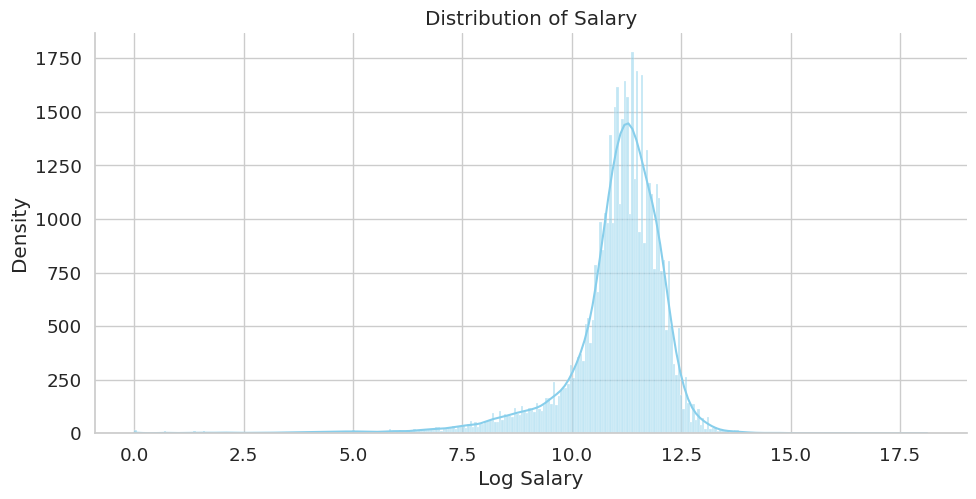

In [98]:
# Vẽ biểu đồ
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
plot = sns.displot(df['Log_Salary'], kde=True, color='skyblue', aspect=2)
plot.set(title='Distribution of Salary', xlabel='Log Salary', ylabel='Density')
plt.show()


In [99]:
Q1 = df['Salary'].quantile(0.25)
Q2 = df['Salary'].quantile(0.50)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= low) & (df['Salary'] <= high)]

In [100]:
# Dữ liệu phân bố từ 10 đến 13 nên ta lựa chọn khoảng này
df = df[df['Log_Salary'] >= 10]
df = df[df['Log_Salary'] <= 13]

<Figure size 1000x600 with 0 Axes>

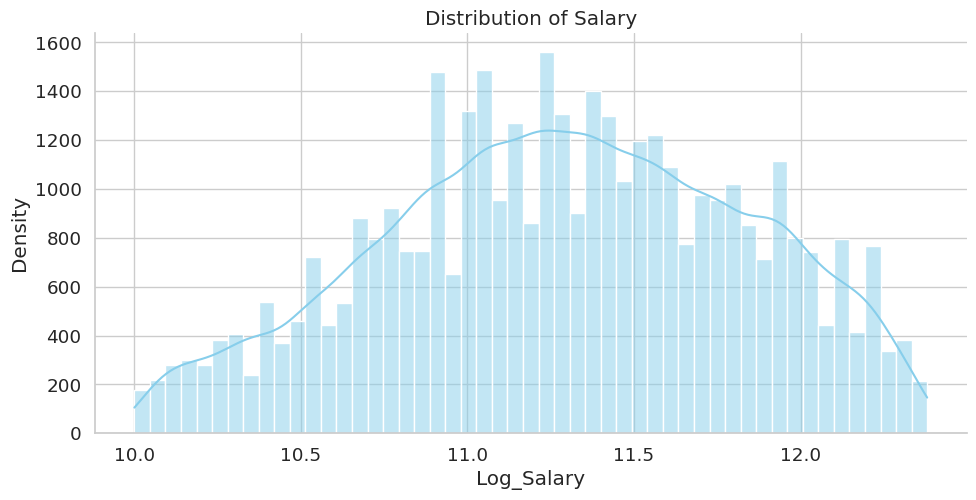

In [101]:
# Vẽ biểu đồ
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
plot = sns.displot(df['Log_Salary'], kde=True, color='skyblue', aspect=2)
plot.set(title='Distribution of Salary', xlabel='Log_Salary', ylabel='Density')
plt.show()

In [102]:
df = df.drop('Log_Salary', axis = 1)

## EDA (Huỳnh Công Đức)

In [103]:
df.shape

(39772, 47)

In [104]:
df.to_csv('../dataset/clean_data.csv')